# Talk demo intro

In [1]:
! pip install -q torch
! pip install -q tensor-sensor

## Simulated GRU matrix algebra with dimension issue

In [1]:
import torch

n = 200         # number of instances
d = 764         # number of instance features
nhidden = 256

Whh = torch.eye(nhidden, nhidden)   # Identity matrix
Uxh = torch.randn(d, nhidden)
bh  = torch.zeros(nhidden, 1)
h = torch.randn(nhidden, 1)         # fake previous hidden state h
r = torch.randn(nhidden, 1)         # fake this computation
X = torch.rand(n,d)                 # fake input

# Following code raises an exception
h = torch.tanh(Whh @ (r*h) + Uxh @ X.T + bh)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (764x256 and 764x200)

## TensorSensor traps, clarifies, and visualizes issues

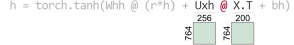

RuntimeError: mat1 and mat2 shapes cannot be multiplied (764x256 and 764x200)
Cause: @ on tensor operand Uxh w/shape [764, 256] and operand X.T w/shape [764, 200]

In [3]:
import tsensor

with tsensor.clarify():
    h = torch.tanh(Whh @ (r*h) + Uxh @ X.T + bh)

TensorSensor has augmented the exception object's message with:

```
Cause: @ on tensor operand Uxh w/shape [764, 256] and operand X.T w/shape [764, 200]
```

## Fix error and clarify() does nothing

In [4]:
Uxh = torch.randn(nhidden, d)
with tsensor.clarify():
    h = torch.tanh(Whh @ (r*h) + Uxh @ X.T + bh)  # state vector update equation

## Explaining code w/o errors

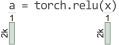

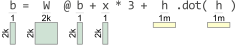

In [5]:
W = torch.rand(size=(2000,2000))
b = torch.rand(size=(2000,1))
h = torch.rand(size=(1_000_000,))
x = torch.rand(size=(2000,1))

with tsensor.explain():
    a = torch.relu(x)
    b = W @ b + x * 3 + h.dot(h)

## Abstract syntax tree (AST) with operand shapes

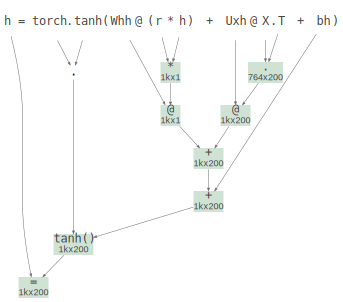

In [7]:
n = 200         # number of instances
d = 764         # number of instance features
nhidden = 1000

Whh = torch.eye(nhidden, nhidden)   # Identity matrix
Uxh = torch.randn(nhidden, d)
bh  = torch.zeros(nhidden, 1)
h = torch.randn(nhidden, 1)         # fake previous hidden state h
r = torch.randn(nhidden, 1)         # fake this computation
X = torch.rand(n,d)                 # fake input

tsensor.astviz("h = torch.tanh(Whh @ (r*h) + Uxh @ X.T + bh)")

## For slides

### Try print statements

In [ ]:
import torch

n = 200         # number of instances
d = 764         # number of instance features
nhidden = 256

Whh = torch.eye(nhidden, nhidden)   # Identity matrix
Uxh = torch.randn(d, nhidden)
bh  = torch.zeros(nhidden, 1)
h = torch.randn(nhidden, 1)         # fake previous hidden state h
r = torch.randn(nhidden, 1)         # fake this computation
X = torch.rand(n,d)                 # fake input

print(Whh.shape, r.shape, h.shape, Uxh.shape, X.shape, bh.shape)
print((r*h).shape)
print((Whh@(r*h)).shape)
print((Uxh@X.T).shape) # <-- exception!
print((Whh@(r*h)+Uxh@X.T).shape)
print((Whh@(r*h)+Uxh@X.T+bh).shape)
h = torch.tanh(Whh @ (r*h) + Uxh @ X.T + bh)